In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 5: Document Clustering

Document clustering is an important application of clustering algorithms.
Document clustering algorithms can be used to automatically group search results into categories, making it easier to find relevant results.

In this problem, you'll be clustering articles published on [Daily Kos](https://www.dailykos.com/), an American political blog

The file *dailykos.csv* contains data on 3,430 news articles or blogs that have been posted on Daily Kos.
These articles were posted in 2004, leading up to the United States Presidential Election. 

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/dailykos.csv'
data = pd.read_csv(url)
data

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each of the features in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total).  For each document, the feature values are the number of times that word appeared in the document.

In [4]:
list_of_words = np.array(data.columns)
list(list_of_words)

['abandon',
 'abc',
 'ability',
 'abortion',
 'absolute',
 'abstain',
 'abu',
 'abuse',
 'accept',
 'access',
 'accomplish',
 'account',
 'accurate',
 'accusations',
 'achieve',
 'acknowledge',
 'act',
 'action',
 'active',
 'activist',
 'actual',
 'add',
 'added',
 'addition',
 'address',
 'admin',
 'administration',
 'admit',
 'advance',
 'advantage',
 'advertise',
 'advised',
 'affair',
 'affect',
 'affiliate',
 'afghanistan',
 'afraid',
 'afternoon',
 'age',
 'agencies',
 'agenda',
 'agree',
 'ahead',
 'aid',
 'aim',
 'air',
 'alaska',
 'allegation',
 'allegory',
 'allied',
 'allowed',
 'alternative',
 'altsite',
 'amazing',
 'amendment',
 'america',
 'american',
 'amount',
 'amp',
 'analysis',
 'analyst',
 'anecdotal',
 'anger',
 'angry',
 'announce',
 'annual',
 'answer',
 'apologies',
 'apparent',
 'appeal',
 'appearance',
 'applied',
 'appointed',
 'approach',
 'approval',
 'apr',
 'april',
 'arab',
 'area',
 'arent',
 'arg',
 'argue',
 'argument',
 'arizona',
 'arm',
 'armstro

In this part, we are trying to cluster news articles or blog posts into groups. 
This can be used to show readers categories to choose from when trying to decide what to read. 

## Part 1: k-means clustering

Cluster the articles using k-means, and ensure that you have a good number of clusters (using the "elbow" method, for example).

In [17]:
X = data.to_numpy().astype('float')

In [70]:
def kmeans(X,k,max_iterations=1000, return_inertia=False):
    
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k)] 
    distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
    clusters = np.argmin(distances, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
        new_clusters = np.argmin(distances, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
        
    
    results = {'clusters' : clusters, 'means' : means}
    # compute inertia
    if return_inertia:
        results['inertia'] = np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m
    
    return results

iterations = 1
iterations = 4
iterations = 20
iterations = 34
iterations = 30
iterations = 27
iterations = 19
iterations = 32
iterations = 26
iterations = 23
iterations = 20
iterations = 25
iterations = 23
iterations = 26
iterations = 41
iterations = 17
iterations = 32
iterations = 43
iterations = 35


Text(0, 0.5, 'inertia')

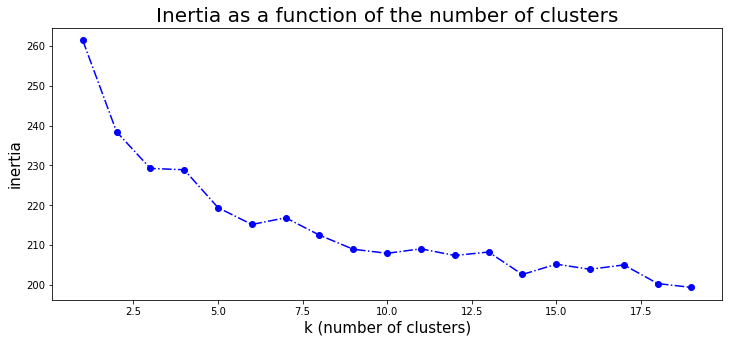

In [71]:
k_list = np.arange(1,20)
inertias = np.zeros(len(k_list))
for i in range(len(k_list)):
    k = k_list[i]
    results = kmeans(X,k,return_inertia=True)
    inertias[i] = results['inertia']
    
plt.figure(figsize=(12,5))
plt.plot(k_list,inertias,'bo-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

The optimal number of clusters is not clear on this inertia plot, so let's take k=7.

In [88]:
k = 8
results = kmeans(X,k)
clusters = results['clusters']

iterations = 19


## Part 2

 Find the 10 most frequent words in each cluster.

In [94]:
for i in range(k):
    top_words = np.argsort(-np.sum(X[clusters==i],axis=0))[0:10]
    print('CLUSTER '+str(i))
    print(list(list_of_words[top_words]))

CLUSTER 0
['dean', 'kerry', 'edward', 'clark', 'democrat', 'poll', 'primaries', 'campaign', 'iowa', 'gephardt']
CLUSTER 1
['bush', 'kerry', 'poll', 'presided', 'democrat', 'campaign', 'state', 'voter', 'percent', 'general']
CLUSTER 2
['democrat', 'race', 'seat', 'senate', 'state', 'republican', 'gop', 'poll', 'win', 'candidate']
CLUSTER 3
['november', 'poll', 'vote', 'challenge', 'bush', 'democrat', 'republican', 'house', 'senate', 'kerry']
CLUSTER 4
['democrat', 'republican', 'parties', 'state', 'elect', 'candidate', 'campaign', 'vote', 'senate', 'race']
CLUSTER 5
['union', 'endorse', 'labor', 'gephardt', 'dean', 'candidate', 'state', 'primaries', 'member', 'support']
CLUSTER 6
['iraq', 'bush', 'war', 'administration', 'american', 'iraqi', 'report', 'official', 'presided', 'state']
CLUSTER 7
['bush', 'kerry', 'poll', 'democrat', 'elect', 'republican', 'general', 'state', 'time', 'campaign']


In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party?

In [96]:
# cluster 0
top_words = np.argsort(-np.sum(X[clusters==0],axis=0))[0:10]
list(list_of_words[top_words])

['dean',
 'kerry',
 'edward',
 'clark',
 'democrat',
 'poll',
 'primaries',
 'campaign',
 'iowa',
 'gephardt']

Which k-means cluster best corresponds to the Iraq War?

In [98]:
# cluster 6
top_words = np.argsort(-np.sum(X[clusters==6],axis=0))[0:10]
list(list_of_words[top_words])

['iraq',
 'bush',
 'war',
 'administration',
 'american',
 'iraqi',
 'report',
 'official',
 'presided',
 'state']

## Part 3: Hierarchical Clustering

Now, run hierarchical clustering (this will probably take you a while. Why?)
Pick the number of clusters equal to the number of clusters you used in parts 1 and 2.

In [19]:
def hierarchical_clustering(X,n_clusters=1):   
    
    m,n = X.shape #dataset size, number of features
    
    # cluster distance matrix
    distances = np.sum(X**2,axis=1)[:,None]+np.sum(X**2,axis=1)[None,:]-2*X.dot(X.T)
    np.fill_diagonal(distances, np.inf)
    
    # Make each point its own cluster of one
    k = m 
    clusters = np.arange(k)
    #print(clusters)
    # hierarchical clustering iteration'
    while k>n_clusters:  
        
        # find closer clusters
        i, j = np.unravel_index(np.argmin(distances),(k,k))
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        # merge clusters
        clusters[clusters==j]=i

        # rename clusters
        clusters[clusters>j] -= 1
        
        # recompute distance from the new cluster i to the remaining clusters'
        distances[i] = np.minimum(distances[i],distances[j]) # 
        distances[:,i] = distances[i] # distance_clusters matrix is symmetric
        distances[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        distances = np.delete(distances,j,0) # remove row j
        distances = np.delete(distances,j,1) # remove column j
        
        # reduce number of clusters
        k = k-1
    return clusters

In [26]:
clusters = hierarchical_clustering(X,n_clusters=8)

In [27]:
for i in range(8):
    top_words = np.argsort(-np.sum(X[clusters==i],axis=0))[0:10]
    print('CLUSTER '+str(i))
    print(list(list_of_words[top_words]))

CLUSTER 0
['bush', 'kerry', 'poll', 'democrat', 'november', 'republican', 'vote', 'state', 'elect', 'house']
CLUSTER 1
['race', 'democrat', 'incumbency', 'poll', 'republican', 'district', 'seat', 'percent', 'lead', 'cycle']
CLUSTER 2
['bush', 'state', 'vote', 'time', 'kerry', 'campaign', 'presided', 'win', 'elect', 'administration']
CLUSTER 3
['threat', 'iraq', 'weapon', 'presided', 'bush', 'mass', 'state', 'saddam', 'destruction', 'regime']
CLUSTER 4
['democrat', 'seat', 'win', 'candidate', 'republican', 'won', 'strong', 'district', 'gop', 'running']
CLUSTER 5
['parties', 'democrat', 'dnc', 'organization', 'voter', 'campaign', 'labor', 'million', 'field', 'elect']
CLUSTER 6
['percent', 'bush', 'kerry', 'poll', 'november', 'vote', 'challenge', 'race', 'presided', 'republican']
CLUSTER 7
['target', 'rep', 'democrat', 'gop', 'held', 'parties', 'race', 'seat', 'dem', 'play']
